In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter
import getpass

In [3]:
qfib_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
qfib_ext = '.tck'
dpy_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
dpy_ext = '.tck'
tko_dir = '/home/'+getpass.getuser()+'/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])
        
# files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [9,10]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/SCP_right.vtk 2207076
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/OR_left.vtk 11962588
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/CA.vtk 877877
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/UF_right.vtk 10534372
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/ICP_right.vtk 4128800
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/SLF_left.vtk 22301799
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/Cingulum_right.vtk 49672559
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/SLF_right.vtk 21387539
/home/haehn/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_

In [4]:
files

['SCP_right',
 'OR_left',
 'CA',
 'UF_right',
 'ICP_right',
 'SLF_left',
 'Cingulum_right',
 'SLF_right',
 'Cingulum_left',
 'POPT_right',
 'CP',
 'CST_left',
 'FPT_right',
 'Fornix',
 'POPT_left',
 'CST_right',
 'ICP_left',
 'ILF_left',
 'OR_right',
 'FPT_left',
 'ILF_right',
 'UF_left',
 'CC',
 'MCP',
 'SCP_left']

In [5]:
dpy_sizes, dpy_errors, dpy_stds, dpy_advstats = sprinter.Sprinter.run_dpy(qfib_files)

In [6]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [7]:
runs = {}

In [8]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

In [9]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds, tko_advstats = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds, tko_advstats]

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In futur

/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \
/home/haehn/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


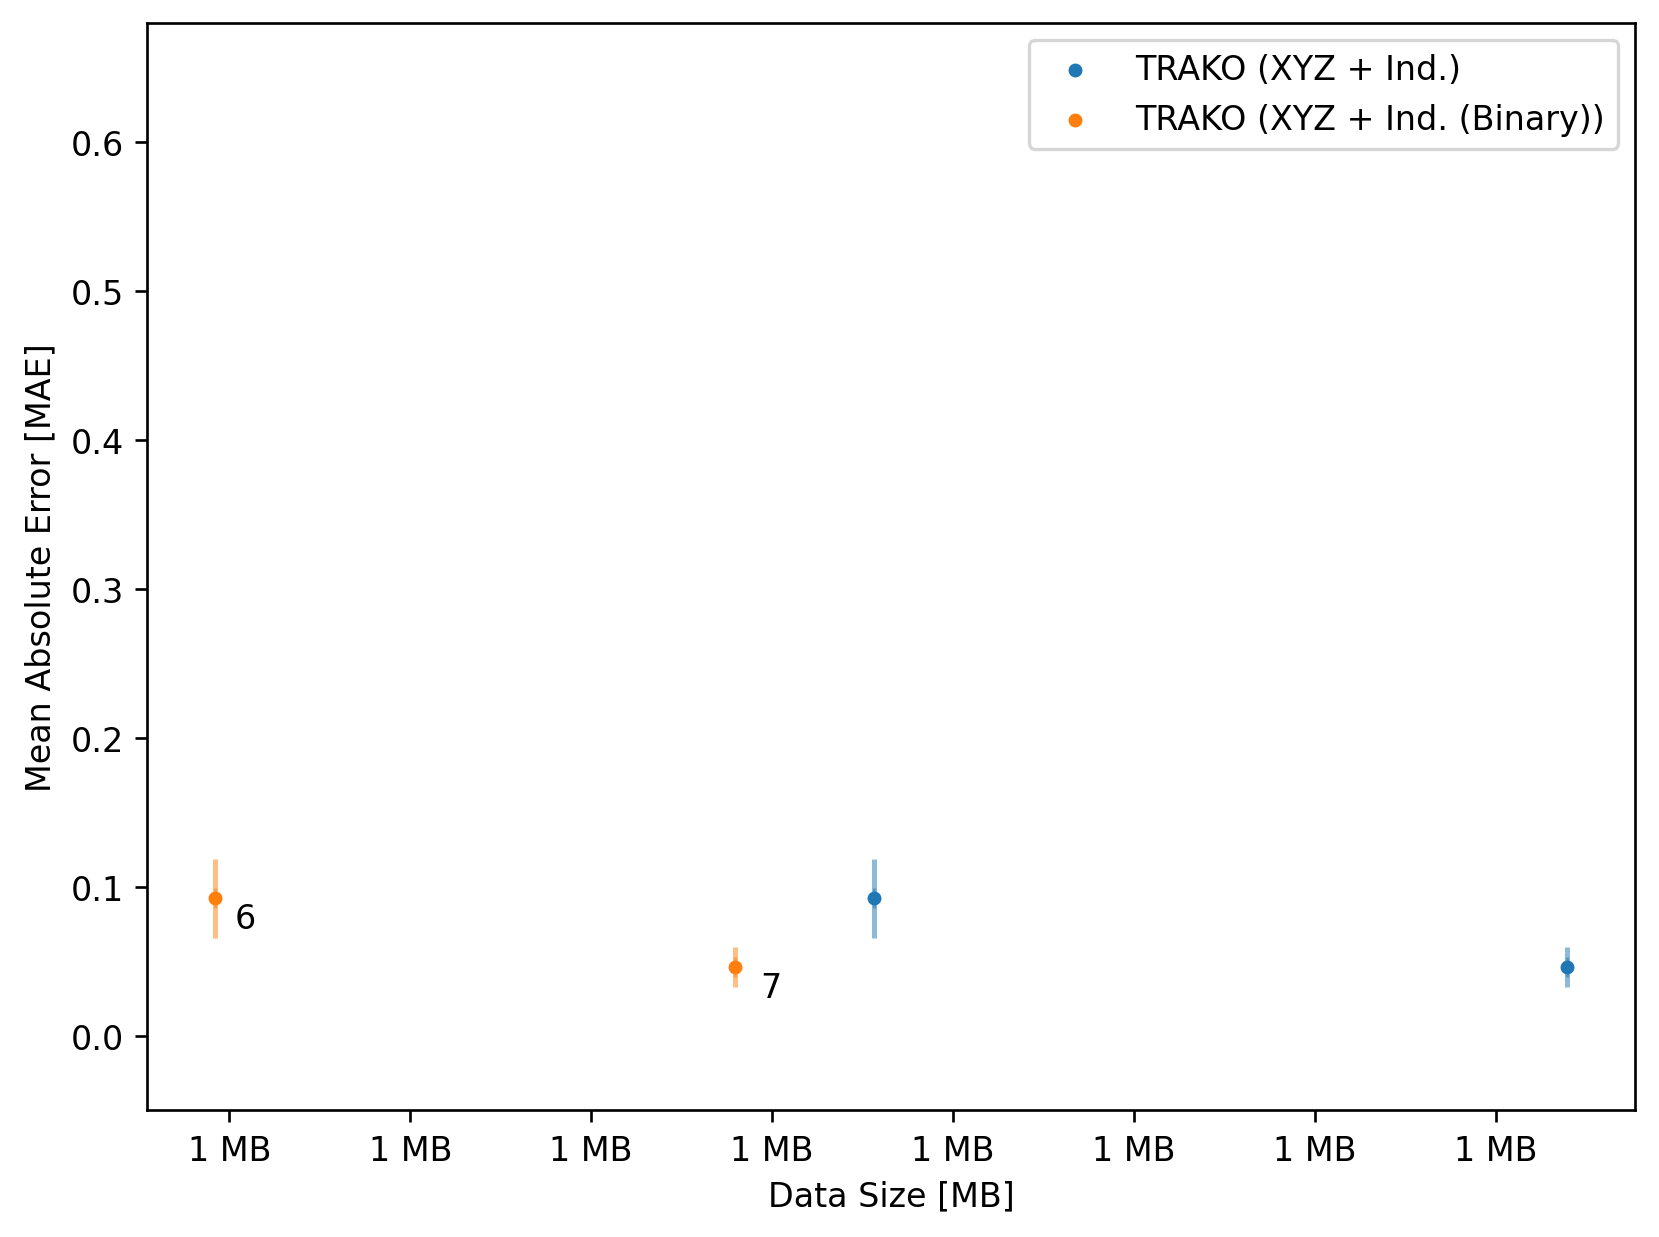

In [10]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename='/tmp/ISMRM_full.pdf')

In [11]:
print(input_size/1000000)

16.54675228


In [12]:
qfib_sizes, qfib_errors, qfib_stds, qfib_advstats = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [13]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'qfib': [qfib_sizes, qfib_errors, qfib_stds, qfib_advstats]}, selector=1)

--------------------
qfib
size 1743182.28
ratio 89.46510922202553
c_factor 9.49226737206163
min_e 0.0
max_e 59.316216
mean_e 11.60962635487318
std 6.2928250437323
e_min_e 0.0
e_max_e 59.2963
e_mean_e 10.443111752597614
e_std 10.443111752597614
c_time 272.0438723564148
d_time 48.28083848953247
--------------------
~~~qfib & 2.0 & 89.465$\times$ & 9.492\% & 0.0 & 59.316 & 11.61$\pm$6.293 & 0.0 & 59.296 & 10.443$\pm$10.443 & 272.044 & 48.281\\


In [14]:
sprinter.Sprinter.createtable('qfib-data', input_size, {'dpy': [dpy_sizes, dpy_errors, dpy_stds, dpy_advstats]}, selector=0)

--------------------
dpy
size 217126928
ratio -1212.2026868223595
c_factor 0.07620773909719755
min_e 0.0
max_e 0
mean_e 0
std 0
e_min_e 0.0
e_max_e 0
e_mean_e 0.0
e_std 0.0
c_time 0
d_time 0
--------------------
~~~dpy & 217.0 & -1212.203$\times$ & 0.076\% & 0.0 & 0 & 0.0$\pm$0.0 & 0.0 & 0 & 0.0$\pm$0.0 & 0 & 0\\


In [17]:
sprinter.Sprinter.createtable('qfib-data', input_size, runs, selector=0)

--------------------
qbi{bits}
size 1456052.16
ratio 91.20037494149274
c_factor 11.36412055458233
min_e 0.0003543359
max_e 0.23319645
mean_e 0.09244857817888259
std 0.026566171273589134
e_min_e 0.0011778214
e_max_e 0.228835
e_mean_e 0.09227696374058723
e_std 0.015088207311928272
c_time 32.802653789520264
d_time 48.84976935386658
--------------------
~~~XYZ + Ind. & 1.0 & 91.2$\times$ & 11.364\% & 0.0 & 0.233 & 0.092$\pm$0.027 & 0.001 & 0.229 & 0.092$\pm$0.015 & 32.803 & 48.85\\
--------------------
qbi{bits}_binary
size 1091896.32
ratio 93.40114421535294
c_factor 15.154142363992946
min_e 0.0003543359
max_e 0.23319647
mean_e 0.09244857847690582
std 0.026566171273589134
e_min_e 0.0011778214
e_max_e 0.228835
e_mean_e 0.09227696374058723
e_std 0.015088207311928272
c_time 16.70813512802124
d_time 26.480645656585693
--------------------
~~~XYZ + Ind. (Binary) & 1.0 & 93.401$\times$ & 15.154\% & 0.0 & 0.233 & 0.092$\pm$0.027 & 0.001 & 0.229 & 0.092$\pm$0.015 & 16.708 & 26.481\\
